In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from scipy.stats import chi2_contingency
from scipy.stats import pointbiserialr
from scipy.stats import skew, kurtosis
from scipy import stats

In [2]:
kr_df_med = pd.read_csv('../src/KR_Medical_Waste.csv', header='infer')

In [8]:
kr_df_med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   업체명     13 non-null     object 
 1   2017    13 non-null     float64
 2   2021    13 non-null     float64
 3   2022    13 non-null     float64
dtypes: float64(3), object(1)
memory usage: 548.0+ bytes


In [11]:
kr_df_med.describe()

,2017,2021,2022
count,13.000000,13.000000,13.000000
mean,15841.276923,16298.576154,8155.468462
std,12698.932387,9524.388384,4451.375375
min,1799.740000,3577.440000,1823.790000
25%,5986.010000,8730.440000,4831.200000
50%,9801.840000,17521.350000,8153.730000
75%,23205.360000,19449.650000,10535.810000
max,40417.030000,34929.560000,16071.190000


In [3]:
df = kr_df_med.copy()  # Make a copy to avoid modifying the original
df['target'] = df['2022']  # Set a target column
print(df.head())


            업체명      2017      2021      2022    target
0         (주)경서   1799.74   6363.40   4831.20   4831.20
1       (주)디디에스   4092.69  10695.88   5459.09   5459.09
2  (주)스테리싸이클코리아  34969.74  34929.56  16071.19  16071.19
3       (주)아림환경  22463.80  17521.35   8941.49   8941.49
4  (주)에코비트에너지경주  40417.03  30903.76  16013.73  16013.73


In [7]:
df = kr_df_med.copy()
df['target'] = df['2021']
print(df.head())

            업체명      2017      2021      2022    target
0         (주)경서   1799.74   6363.40   4831.20   6363.40
1       (주)디디에스   4092.69  10695.88   5459.09  10695.88
2  (주)스테리싸이클코리아  34969.74  34929.56  16071.19  34929.56
3       (주)아림환경  22463.80  17521.35   8941.49  17521.35
4  (주)에코비트에너지경주  40417.03  30903.76  16013.73  30903.76


In [10]:
years = ['2017', '2021', '2022']

max_values = kr_df_med[years].max().values
max_companies = kr_df_med.loc[kr_df_med[years].idxmax(), '업체명'].values

outcome = pd.DataFrame({'Year': years, 'Company': max_companies, 'Value': max_values})
print(outcome)

   Year       Company     Value
0  2017  (주)에코비트에너지경주  40417.03
1  2021  (주)스테리싸이클코리아  34929.56
2  2022  (주)스테리싸이클코리아  16071.19


In [12]:
kr_df_med['Highest Year'] = kr_df_med[years].idxmax(axis=1)
print(kr_df_med[['업체명', 'Highest Year']])

               업체명 Highest Year
0            (주)경서         2021
1          (주)디디에스         2021
2     (주)스테리싸이클코리아         2017
3          (주)아림환경         2017
4     (주)에코비트에너지경주         2017
5     (주)에코비트에너지광주         2017
6        (주)엔비텍코리아         2017
7          (주)이메디원         2021
8          도시환경(주)         2017
9          엔씨메디(주)         2021
10    주식회사 에코비트에너지         2021
11  주식회사 에코비트에너지경산         2021
12         창광실업(주)         2017


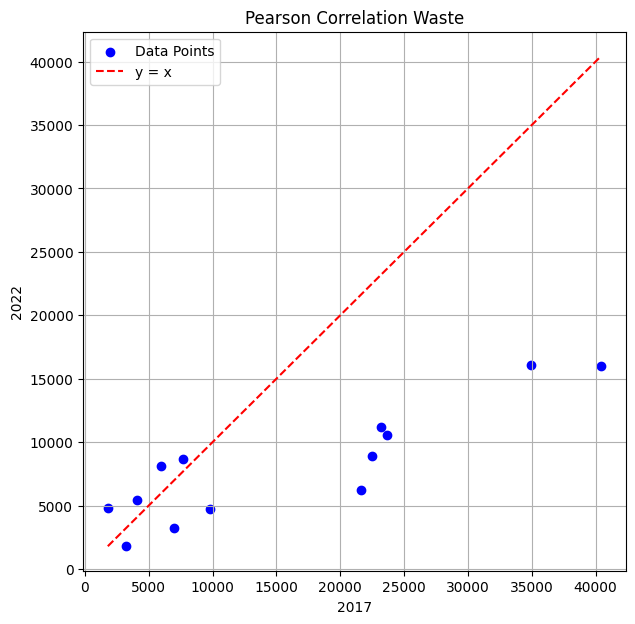

In [15]:
x = kr_df_med['2017']  # Feature
y = kr_df_med['2022']  # Target

plt.figure(figsize=(7, 7))
plt.scatter(x, y, color='blue', label="Data Points")

min_val = min(x.min(), y.min())  
max_val = max(x.max(), y.max())  
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label="y = x")

plt.xlabel("2017")
plt.ylabel("2022")
plt.title("Pearson Correlation Waste")
plt.legend()
plt.grid(True)
plt.show()

Correlated Pearson between variables:
          2017      2021      2022
2017  1.000000  0.904600  0.880102
2021  0.904600  1.000000  0.974276
2022  0.880102  0.974276  1.000000
Most correlated variable: 2022 with value: 1.0


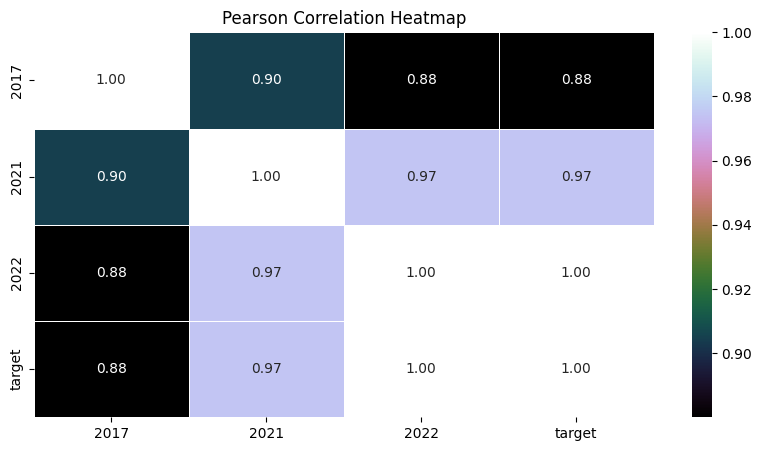

In [ ]:

numeric_df = df.select_dtypes(include=['number'])

matrix_correlated = numeric_df.corr(method='pearson')

matrix_correlated_no_target = matrix_correlated.drop('target', axis=1).drop('target', axis=0)

print(f"Correlated Pearson between variables:\n{matrix_correlated_no_target}")

correlations = matrix_correlated['target'].drop('target')

variable_m_correlated = correlations.idxmax()  
value_m_correlated = correlations.max()  

print(f"Most correlated variable: {variable_m_correlated} with value: {value_m_correlated}")

plt.figure(figsize=(10, 5))
sns.heatmap(matrix_correlated, cmap='cubehelix', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

